In [1]:
!pip install stackapi

In [2]:
from stackapi import StackAPI
import pandas as pd
import json
import csv
import re

In [3]:
site = StackAPI('stackoverflow')

In [4]:
comments = site.fetch('comments')

In [5]:
questions = site.fetch('questions', tagged='machine-learning', sort='votes')

In [6]:
questions

{'backoff': 0,
 'has_more': True,
 'page': 5,
 'quota_max': 300,
 'quota_remaining': 300,
 'total': 0,
 'items': [{'tags': ['machine-learning',
    'neural-network',
    'artificial-intelligence',
    'backpropagation'],
   'owner': {'reputation': 9923,
    'user_id': 280454,
    'user_type': 'registered',
    'accept_rate': 76,
    'profile_image': 'https://www.gravatar.com/avatar/278b7b479720b6e7e08f9e49d0223523?s=128&d=identicon&r=PG',
    'display_name': 'Karan',
    'link': 'https://stackoverflow.com/users/280454/karan'},
   'is_answered': True,
   'view_count': 333463,
   'protected_date': 1540724188,
   'accepted_answer_id': 2499936,
   'answer_count': 20,
   'score': 823,
   'last_activity_date': 1596173224,
   'creation_date': 1269033492,
   'last_edit_date': 1579544249,
   'question_id': 2480650,
   'content_license': 'CC BY-SA 4.0',
   'link': 'https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks',
   'title': 'What is the role of the b

In [7]:
jsonfile = json.dumps(questions)

In [8]:
jsonfile

'{"backoff": 0, "has_more": true, "page": 5, "quota_max": 300, "quota_remaining": 300, "total": 0, "items": [{"tags": ["machine-learning", "neural-network", "artificial-intelligence", "backpropagation"], "owner": {"reputation": 9923, "user_id": 280454, "user_type": "registered", "accept_rate": 76, "profile_image": "https://www.gravatar.com/avatar/278b7b479720b6e7e08f9e49d0223523?s=128&d=identicon&r=PG", "display_name": "Karan", "link": "https://stackoverflow.com/users/280454/karan"}, "is_answered": true, "view_count": 333463, "protected_date": 1540724188, "accepted_answer_id": 2499936, "answer_count": 20, "score": 823, "last_activity_date": 1596173224, "creation_date": 1269033492, "last_edit_date": 1579544249, "question_id": 2480650, "content_license": "CC BY-SA 4.0", "link": "https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks", "title": "What is the role of the bias in neural networks?"}, {"tags": ["algorithm", "machine-learning", "difference"]

In [9]:
df = pd.read_json(jsonfile)
dfs = pd.DataFrame()
for x in range(len(df)):
    title = df['items'][x]['title']
    df1 = {'questions':title}
    dfs = dfs.append(df1, ignore_index=True)
len(dfs)

500

In [10]:
dfs.head()

,questions
0,What is the role of the bias in neural networks?
1,What is the difference between a generative an...
2,Tensorflow: how to save/restore a model?
3,A simple explanation of Naive Bayes Classifica...
4,How does the Google &quot;Did you mean?&quot; ...


In [11]:
dfs['questions'] = dfs['questions'].str.lower()

In [12]:
dfs.head()

,questions
0,what is the role of the bias in neural networks?
1,what is the difference between a generative an...
2,tensorflow: how to save/restore a model?
3,a simple explanation of naive bayes classifica...
4,how does the google &quot;did you mean?&quot; ...


In [13]:
#remove all non alphabetic characters
regex_1 = re.compile(r'[^a-zA-Z]')
dfs['questions'] = pd.Series(dfs['questions']).str.replace(regex_1, ' ')

#reduce multi-space to single space
regex_2 = re.compile(r' +')
dfs['questions'] = pd.Series(dfs['questions']).str.replace(regex_2,' ')

In [14]:
dfs.head()
dfs.to_csv('stackoverflow-raw-data.csv')

In [15]:
dfs.to_csv('stackoverflow.csv')

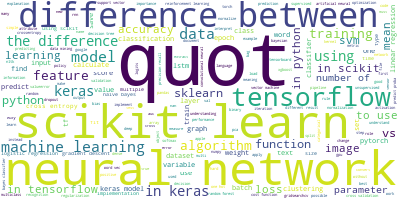

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(dfs['questions'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

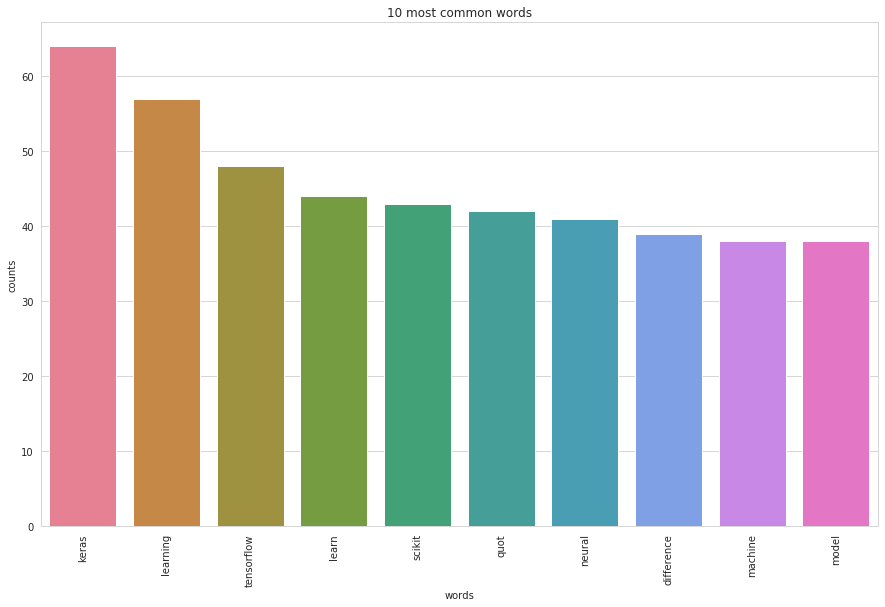

In [17]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(dfs['questions'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [18]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
quot neural network tensorflow keras cross training does data using

Topic #1:
learn scikit learning difference keras python model tensorflow vs machine

Topic #2:
regression model linear sklearn gradient features save logistic using descent

Topic #3:
learning machine keras use tensorflow data naive python difference classifier

Topic #4:
learn scikit neural networks svm using function python use algorithm
